In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

# Get the dataset

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Function to Plot Image

In [4]:
def plot_image(i):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()

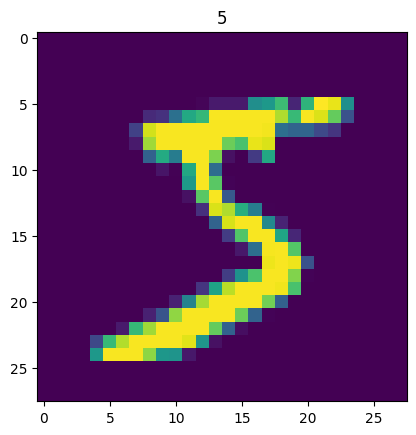

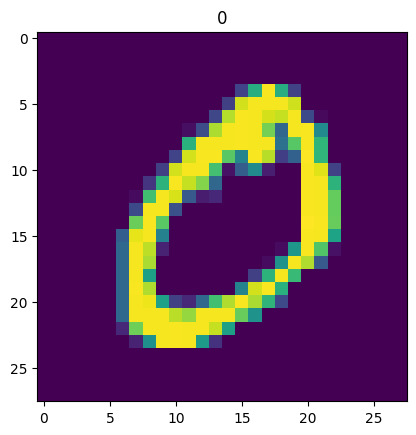

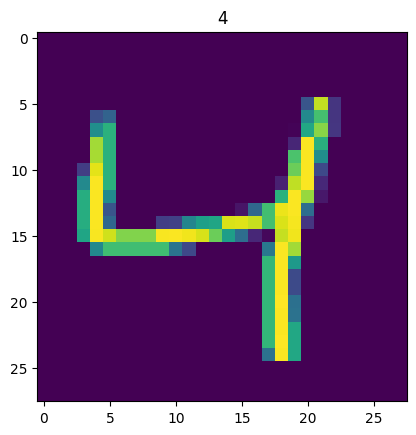

In [5]:
for i in range(3):
    plot_image(i)

In [6]:
# Pre Processing
def images_preprocessing(train,test):
    #Normalization
    train = train.astype(np.float32)/255
    test = test.astype(np.float32)/255   
    #Reshape
    train = np.reshape(train,(train.shape[0],-1))
    test = np.reshape(test,(test.shape[0],-1))
    return train,test
    

In [7]:
X_train,X_test = images_preprocessing(X_train,X_test)

In [8]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [9]:
y_train.shape,y_test.shape

((60000,), (10000,))

# Model Building

In [10]:
from keras.layers import Dense,Flatten
from keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
model.add(Dense(784,input_shape=(784, ), kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 641946 (2.45 MB)
Trainable params: 641946 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
from keras.optimizers import Adam
model.compile(optimizer= Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [15]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=8, verbose=1, mode='auto')

# Model Training

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [17]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val,y_val),
    batch_size=32
)

Epoch 1/50


1500/1500 [==============================] - 5s 3ms/step - loss: 0.2379 - accuracy: 0.9295 - val_loss: 0.1337 - val_accuracy: 0.9576
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0948 - accuracy: 0.9712 - val_loss: 0.0893 - val_accuracy: 0.9744
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0606 - accuracy: 0.9804 - val_loss: 0.0900 - val_accuracy: 0.9740
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0868 - val_accuracy: 0.9746
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0881 - val_accuracy: 0.9781
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0946 - val_accuracy: 0.9768
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.1082 - val_accurac

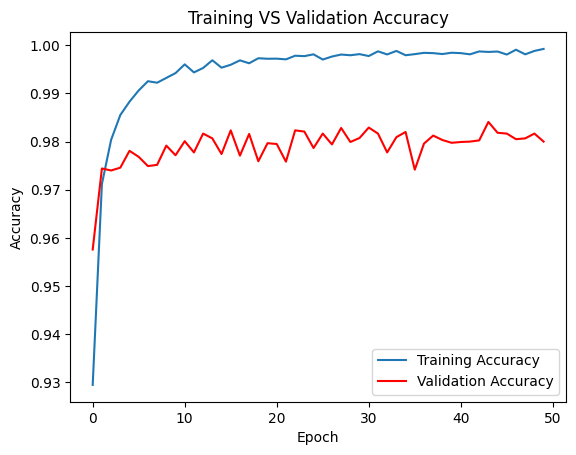

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels and title
plt.title('Training VS Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()

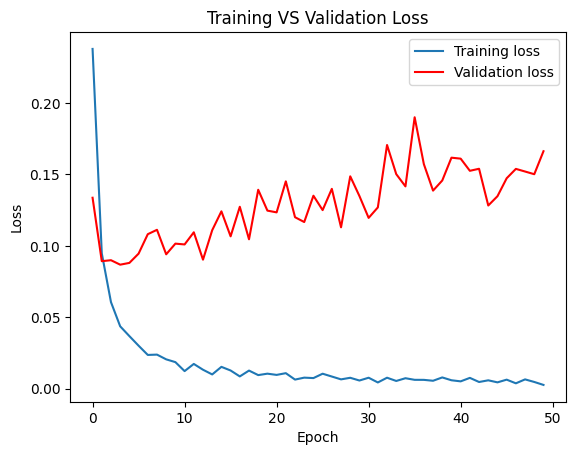

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Validation loss')

# Add labels and title
plt.title('Training VS Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


In [20]:
Train_sc = model.evaluate(X_train,y_train)
Valid_sc = model.evaluate(X_val,y_val)
Test_sc = model.evaluate(X_test,y_test)
#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Valid_sc[0], '\n')

313/313 [==============================] - 0s 1ms/step - loss: 0.1633 - accuracy: 0.9788
Train Scores : 
    accuracy: 0.9986875057220459 
      Loss:  0.006696762517094612 

Valid Scores : 
    accuracy: 0.9800000190734863 
      Loss:  0.1662769317626953 

Test Scores : 
    accuracy: 0.9787999987602234 
      Loss:  0.1662769317626953 



In [21]:
model.save('handwritten_ANN.h5')

c:\Users\zeyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 54ms/step
The letter is - 0
1/1 [==============================] - 0s 16ms/step
The letter is - 0
1/1 [==============================] - 0s 15ms/step
The letter is - 4
1/1 [==============================] - 0s 16ms/step
The letter is - 1


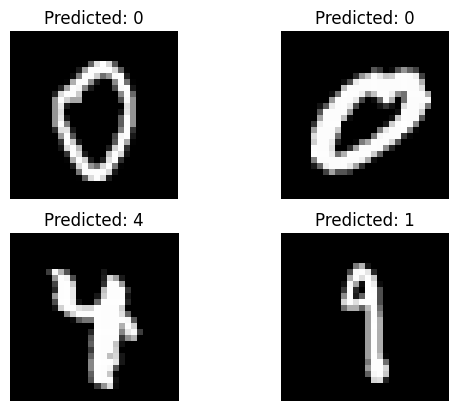

In [22]:
test_images = X_test[2384:2388]
test_images = test_images.reshape(test_images.shape[0], 28, 28)

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1, 784)
    prediction = np.argmax(model.predict(test_image), axis=1)
    digit_dict = [0,1,2,3,4,5,6,7,8,9]

    digit = digit_dict[prediction[0]]
    print("The letter is - {}".format(digit))

    plt.subplot(2, 2, i)
    plt.imshow(org_image, cmap=plt.cm.gray)
    plt.title("Predicted: {}".format(digit))
    plt.axis('off')

plt.show()

In [23]:
from tensorflow.keras.models import load_model
model = load_model('handwritten_ANN.h5')

In [24]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [25]:
y_pred = [np.argmax(item) for item in y_pred]

In [26]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 0,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
# Confusion matrix comparing the predictions to the gold labels
from sklearn.metrics import confusion_matrix
import pandas as pd

classes = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,0,1,2,3,4,5,6,7,8,9
0,970,0,3,1,0,1,3,1,0,1
1,2,1121,6,0,0,1,2,0,3,0
2,0,0,1025,0,0,0,0,3,3,1
3,1,0,7,991,0,2,0,4,2,3
4,1,0,6,0,959,0,4,3,0,9
5,3,0,0,22,0,853,4,1,2,7
6,2,1,1,0,2,2,949,0,1,0
7,3,0,6,1,1,0,0,1003,1,13
8,4,1,10,9,3,5,5,4,926,7
9,3,2,0,1,4,1,2,3,2,991
